# Diferenciación Automática

La diferenciación automática (AD) es una técnica computacional para calcular derivadas de funciones de manera precisa y eficiente. A diferencia de la derivación simbólica (como en álgebra) o la derivación numérica (como las diferencias finitas), la AD descompone una función en operaciones elementales y aplica la regla de la cadena de manera sistemática.

La AD es fundamental en el aprendizaje profundo porque permite calcular gradientes de funciones de costo respecto a los parámetros de redes neuronales, lo que es esencial para el entrenamiento mediante métodos de optimización como el descenso de gradiente.

## ¿Cómo funciona la diferenciación automática?

La AD se basa en la descomposición de una función $f(x)$ en una secuencia de operaciones elementales, y calcula las derivadas de cada operación usando la regla de la cadena:

$$
\frac{df}{dx} = \frac{df}{du} \cdot \frac{du}{dx}
$$

Existen dos modos principales de diferenciación automática:

- **Forward mode (modo directo)**
- **Reverse mode (modo inverso, usado en backpropagation)**

A continuación se explica el modo forward.


## Forward Mode (Modo Directo)

El **forward mode** de diferenciación automática consiste en propagar simultáneamente el valor de la función y la derivada a través de cada operación elemental, siguiendo el flujo de cálculo desde las variables de entrada hasta la salida.


Supongamos que tenemos una función compuesta:

$$
 y = f(x) = h(g(x))
$$

En el modo forward, calculamos tanto el valor como la derivada en cada paso:

- Calculamos $u = g(x)$ y su derivada $\dot{u} = g'(x) \cdot \dot{x}$

- Calculamos $y = h(u)$ y su derivada $\dot{y} = h'(u) \cdot \dot{u}$


Generalizando, para cada variable intermedia $v_i$ definida como $v_i = f_i(v_{j_1}, v_{j_2}, ...)$, propagamos su derivada $\dot{v}_i$ usando la regla de la cadena:

$$
\dot{v}_i = \sum_k \frac{\partial f_i}{\partial v_{j_k}} \cdot \dot{v}_{j_k}
$$


El forward mode es eficiente cuando el número de variables de entrada es pequeño y se requiere la derivada respecto a cada una. Es el método natural para implementar gradientes en funciones escalaras y se utiliza en optimización y aprendizaje automático.

## Ejemplo de Grafo Computacional: Función $f(x) = x^2 + \sin(x)$

Consideremos la función:

$$
f(x) = x^2 + \sin(x)
$$

Esta función se puede descomponer en operaciones elementales para construir un grafo computacional. El grafo representa el flujo de cálculo y las derivadas en forward mode.

### Grafo Computacional

```
x (entrada)
├───► x² ──┐
│          ├───► + ───► f(x)
└─► sin(x) ──┘
```

Donde:
- $v_1 = x^2$
- $v_2 = \sin(x)$
- $f(x) = v_1 + v_2$

### Propagación en Forward Mode

Supongamos $x = 1.0$ y $\dot{x} = 1$ (derivada respecto a sí mismo).

1. **Nodo $v_1 = x^2$**:
   - Valor: $v_1 = 1.0^2 = 1.0$
   - Derivada: $\dot{v}_1 = 2x \cdot \dot{x} = 2 \cdot 1.0 \cdot 1 = 2.0$

2. **Nodo $v_2 = \sin(x)$**:
   - Valor: $v_2 = \sin(1.0) \approx 0.8415$
   - Derivada: $\dot{v}_2 = \cos(x) \cdot \dot{x} = \cos(1.0) \cdot 1 \approx 0.5403$

3. **Nodo $f(x) = v_1 + v_2$**:
   - Valor: $f(x) = 1.0 + 0.8415 = 1.8415$
   - Derivada: $\dot{f}(x) = \dot{v}_1 + \dot{v}_2 = 2.0 + 0.5403 = 2.5403$

La derivada analítica es $f'(x) = 2x + \cos(x)$, evaluada en $x=1$: $2(1) + \cos(1) \approx 2 + 0.5403 = 2.5403$, que coincide con el resultado del forward mode.


## Modo de Reverse (Backpropagation)

El modo de reversa usa ambos barridos, uno hacia adelante y otro hacia atrás. En el primer barrido se calcula el **valor de la función** y en el segundo barrido se calcula la derivada usando la regla de la cadena.

Partimos de la regla de la cadena, considerando que $j$ es el hijo del nodo $i$ y sumando sobre todos los hijos $j$:

$$
\bar{v}_i = \sum_j \frac{\partial v_j}{\partial v_i} \cdot \bar{v}_j
$$

donde $\bar{v}_i$ es la derivada acumulada en el nodo $i$ y la sumatoria recorre todos los nodos hijos $j$ que dependen de $i$. Aquí, la notación de parciales $\frac{\partial v_j}{\partial v_i}$ indica cómo cada nodo hijo $j$ depende de $i$ en el grafo computacional. Esta formulación es la base del algoritmo de backpropagation usado en redes neuronales profundas.

Vamos a trabajar con valores numericos, vamos a estimar el gradiente numerico en un punto

1. Vamos a evaluar un barrido hacia adelante y vamos a calcular a f(x) y vamos a calcular y guardar valores numericos de estas derivadas parciales en cada nodo:

$$
\frac{\partial x_j}{\partial x_i}
$$

2. Vamos a hacer un barrido hacia atras y vamos a utilizar estos valores que hemos almacenado.

Ejemplo:

$$
f(x_1, x_2, x_3) = \frac{x_1 x_2 \sin(x_3) + e^{x_1 x_2} }{x_3}
$$

evaluada en el punto $\mathbf{x} = (1, 2, \pi/2)^T$

### Grafo Computacional (en LaTeX)

Descomposición en nodos:
\[
\begin{aligned}
x_4 &= x_1 \cdot x_2\\
x_5 &= \sin(x_3)\\
x_6 &= x_4 \cdot x_5\\
x_7 &= \exp(x_4)\\
x_8 &= x_6 + x_7\\
x_9 &= \frac{x_8}{x_3} \quad (f)
\end{aligned}
\]

Valores en el punto $\mathbf{x} = (1, 2, \pi/2)^T$:
\[
\begin{aligned}
x_4 &= 1\cdot 2 = 2\\
x_5 &= \sin\!\left(\tfrac{\pi}{2}\right) = 1\\
x_6 &= x_4\cdot x_5 = 2\\
x_7 &= e^{x_4} = e^2 \approx 7.38905609893\\
x_8 &= x_6 + x_7 \approx 2 + 7.38905609893 = 9.38905609893\\
x_9 &= \dfrac{x_8}{x_3} = \dfrac{9.38905609893}{\pi/2} \approx 5.977259
\end{aligned}
\]

Derivadas de las aristas (simbólicas y evaluadas numéricamente):

\[
\begin{aligned}
x_4 &= x_1\cdot x_2
&\quad&
\frac{\partial x_4}{\partial x_1} = x_2 = 2,\qquad
\frac{\partial x_4}{\partial x_2} = x_1 = 1\\[6pt]
x_5 &= \sin(x_3)
&\quad&
\frac{\partial x_5}{\partial x_3} = \cos(x_3) = \cos\!\left(\tfrac{\pi}{2}\right) = 0\\[6pt]
x_6 &= x_4\cdot x_5
&\quad&
\frac{\partial x_6}{\partial x_4} = x_5 = 1,\qquad
\frac{\partial x_6}{\partial x_5} = x_4 = 2\\[6pt]
x_7 &= \exp(x_4)
&\quad&
\frac{\partial x_7}{\partial x_4} = \exp(x_4) = e^2 \approx 7.38905609893\\[6pt]
x_8 &= x_6 + x_7
&\quad&
\frac{\partial x_8}{\partial x_6} = 1,\qquad
\frac{\partial x_8}{\partial x_7} = 1\\[6pt]
x_9 &= \dfrac{x_8}{x_3}
&\quad&
\frac{\partial x_9}{\partial x_8} = \dfrac{1}{x_3} = \dfrac{2}{\pi} \approx 0.63661977237,\\
&&&
\frac{\partial x_9}{\partial x_3} = -\,\dfrac{x_8}{x_3^2} = -\,\dfrac{9.38905609893}{(\pi/2)^2} \approx -3.80477
\end{aligned}
\]

Estas aristas y parciales son las cantidades necesarias para realizar el barrido hacia atrás (reverse mode) y acumular las derivadas desde \(x_9\) hasta las entradas \(x_1,x_2,x_3\).


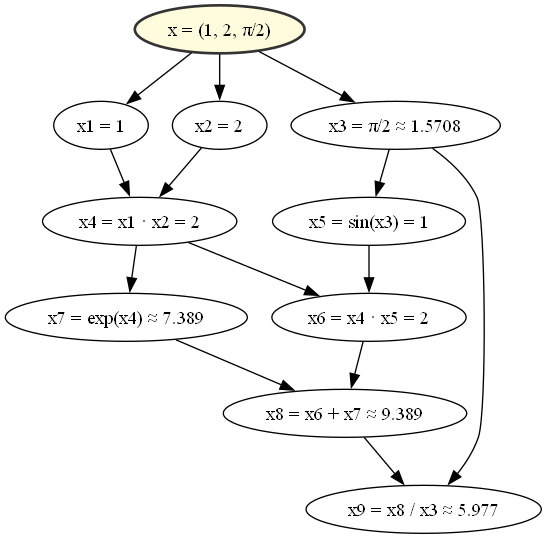

In [4]:
from IPython.display import Image, display

display(Image(filename='computational_graph.png'))

Ahora para el backward sweep, voy a usar la información de las derivadas parciales que calcule para ir calculando lo valores gorro 

$\bar{x}_i = \frac{\partial f}{\partial x_i}$

Por ejemplo, empezamos con el nodo final:

$$
\bar{x}_9 = 1
$$

Por lo tanto, lo que ya teníamos en $x_9$ le voy a sumar 1:

$$
\bar{x}_9  += \frac{\partial f}{\partial x_9} + 1 = 1
$$

Con $\bar{x}_8$:
$$
\bar{x}_8 += \frac{\partial f}{\partial x_8} \cdot \bar{x}_9 = \frac{1}{x_3} \cdot 1 = \frac{2}{\pi} \approx 0.6366
$$

Con $\bar{x}_3$:
$$
\bar{x}_3 += \frac{\partial f}{\partial x_3} \cdot \bar{x}_9 = -\,\frac{x_8}{x_3^2} \cdot 1 = -\,\frac{9.3891}{(\pi/2)^2} \approx -3.8048
$$

Para $\bar{x}_7$:
$$
\bar{x}_7 += \frac{\partial f}{\partial x_7} \cdot \bar{x}_8 = 1 \cdot 0.6366 = 0.6366
$$

Para $\bar{x}_6$:
$$
\bar{x}_6 += \frac{\partial f}{\partial x_6} \cdot \bar{x}_8 = 1 \cdot 0.6366 = 0.6366
$$

Para $\bar{x}_4$:
$$
\bar{x}_4 += \frac{\partial x_6}{\partial x_4} \cdot \bar{x}_6 + \frac{\partial x_7}{\partial x_4} \cdot \bar{x}_7 = (1 \cdot 0.6366) + (7.3891 \cdot 0.6366) \approx 0.6366 + 4.6989 \approx 5.3356
$$

Para $\bar{x}_5$:
$$
\bar{x}_5 += \frac{\partial x_6}{\partial x_5} \cdot \bar{x}_6 = 2 \cdot 0.6366 = 1.2732
$$

Para $\bar{x}_1$:
$$
\bar{x}_1 += \frac{\partial x_4}{\partial x_1} \cdot \bar{x}_4 = 2 \cdot 5.3356 = 10.6711
$$

Para $\bar{x}_2$:
$$
\bar{x}_2 += \frac{\partial x_4}{\partial x_2} \cdot \bar{x}_4 = 1 \cdot 5.3356 = 5.3356
$$

Para $\bar{x}_3$ (acumulando el valor anterior):
$$
\bar{x}_3 += \frac{\partial x_5}{\partial x_3} \cdot \bar{x}_5 = 0 \cdot 1.2732 = 0
$$

El gradiente final es:

$$
\nabla f(\mathbf{x}) =
\begin{bmatrix}
\bar{x}_1 \\
\bar{x}_2 \\
\bar{x}_3
\end{bmatrix}
=
\begin{bmatrix}
10.6711 \\
5.3356 \\
-3.8048
\end{bmatrix}
$$




## Resumen: Reverse Mode (Backpropagation)

Texto (proceso resumido):

1. Evaluación forward: Partimos de las entradas \(x_1,x_2,x_3\) y evaluamos el grafo computacional hacia adelante. En cada nodo calculamos y almacenamos el valor numérico \(x_i\) y las derivadas parciales locales necesarias (las derivadas de cada hijo respecto al padre). Estas derivadas locales son las que figuran en las aristas del grafo (por ejemplo, \(\partial x_4/\partial x_1\), etc.).

2. Inicialización del backward sweep: En el nodo de salida (la función) inicializamos su adjoint con \(\bar{x}_9 = 1\) porque queremos la derivada de la salida respecto a sí misma.

3. Barrido hacia atrás (acumulación): Recorremos los nodos en orden topológico inverso. Para cada nodo padre \(i\), acumulamos su adjoint \(\bar{x}_i\) sumando las contribuciones de todos sus hijos \(j\):

   \(\bar{x}_i \;+=\; \sum_j \frac{\partial x_j}{\partial x_i} \cdot \bar{x}_j\).

   Las cantidades \(\partial x_j/\partial x_i\) se obtuvieron y evaluaron en el barrido hacia adelante.

4. Resultado (gradiente): Al terminar el barrido hacia atrás, los adjoints de las variables de entrada \(\bar{x}_1,\bar{x}_2,\bar{x}_3\) contienen las componentes del gradiente \(\nabla f(\mathbf{x})\).


Matemáticamente (LaTeX) y aplicado al ejemplo:

Recordemos la descomposición en nodos:
\[
\begin{aligned}
x_4 &= x_1 x_2\\
x_5 &= \sin(x_3)\\
x_6 &= x_4 x_5\\
x_7 &= e^{x_4}\\
x_8 &= x_6 + x_7\\
x_9 &= \dfrac{x_8}{x_3} = f
\end{aligned}
\]

Derivadas locales (evaluadas en el punto):
\[
\begin{aligned}
\frac{\partial x_4}{\partial x_1} &= x_2 = 2, &\quad \frac{\partial x_4}{\partial x_2} &= x_1 =1,\\[4pt]
\frac{\partial x_5}{\partial x_3} &= \cos(x_3) = 0,\\[4pt]
\frac{\partial x_6}{\partial x_4} &= x_5 = 1, &\quad \frac{\partial x_6}{\partial x_5} &= x_4 = 2,\\[4pt]
\frac{\partial x_7}{\partial x_4} &= e^{x_4} = e^2,\\[4pt]
\frac{\partial x_8}{\partial x_6} &= 1, &\quad \frac{\partial x_8}{\partial x_7} &= 1,\\[4pt]
\frac{\partial x_9}{\partial x_8} &= \dfrac{1}{x_3} = \dfrac{2}{\pi}, &\quad \frac{\partial x_9}{\partial x_3} &= -\dfrac{x_8}{x_3^2}.
\end{aligned}
\]

Backward sweep (acumulación): empezamos con \(\bar{x}_9 = 1\) y aplicamos
\[
\bar{x}_i = \sum_j \frac{\partial x_j}{\partial x_i} \bar{x}_j.
\]

Evaluando numéricamente (resumen de los pasos ya calculados):
\[
\begin{aligned}
\bar{x}_9 &= 1\\
\bar{x}_8 &= \frac{1}{x_3} \cdot \bar{x}_9 = \frac{2}{\pi} \approx 0.63661977237\\
\bar{x}_3 &= -\frac{x_8}{x_3^2} \cdot \bar{x}_9 \approx -3.80477\\
\bar{x}_7 &= 1 \cdot \bar{x}_8 \approx 0.63662\\
\bar{x}_6 &= 1 \cdot \bar{x}_8 \approx 0.63662\\
\bar{x}_4 &= \frac{\partial x_6}{\partial x_4} \bar{x}_6 + \frac{\partial x_7}{\partial x_4} \bar{x}_7 = 1\cdot 0.63662 + e^2 \cdot 0.63662 \\&\quad\approx 0.63662 + 7.38905609893\cdot 0.63662 \approx 5.3356\\
\bar{x}_5 &= \frac{\partial x_6}{\partial x_5} \bar{x}_6 = 2 \cdot 0.63662 \approx 1.27324\\
\bar{x}_1 &= \frac{\partial x_4}{\partial x_1} \bar{x}_4 = 2 \cdot 5.3356 \approx 10.6712\\
\bar{x}_2 &= \frac{\partial x_4}{\partial x_2} \bar{x}_4 = 1 \cdot 5.3356 \approx 5.3356
\end{aligned}
\]

Gradiente final (aproximado):
\[
\nabla f(1,2,\tfrac{\pi}{2}) \approx \begin{bmatrix}10.6712\\5.3356\\-3.8048\end{bmatrix}.
\]

---

He insertado esta celda al final del notebook con el resumen textual y matemático. Ahora marco la tarea como completada.